## **Car Price Prediction**

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading Dataset

In [2]:
df_cars = pd.read_csv("Clean Data_pakwheels.csv")
print(df_cars.shape)
df_cars.head()

(46022, 14)


,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [3]:
# Dropping non relevant columns
df_cars.drop(columns=['Unnamed: 0'], inplace = True)
df_cars.head(2)

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered


In [4]:
# renaming column names

df_cars.rename(columns = {'Company Name':'brand', 'Model Name':'model', 'Model Year':'year', 'Engine Type':'Engine_Type', 'Engine Capacity':'Engine_Capacity',
                          'Body Type':'body_type', 'Transmission Type':'Transmission_Type',  'Registration Status':'Registration_Status'}, inplace = True)
df_cars.columns = df_cars.columns.str.lower()
print(df_cars.shape)
df_cars.head()

(46022, 13)


,brand,model,price,year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [5]:
# checking null values
df_cars.isna().sum()

brand                  0
model                  0
price                  0
year                   0
location               0
mileage                0
engine_type            0
engine_capacity        0
color                  0
assembly               0
body_type              0
transmission_type      0
registration_status    0
dtype: int64

In [6]:
# checking datatypes
df_cars.dtypes

brand                  object
model                  object
price                   int64
year                    int64
location               object
mileage                 int64
engine_type            object
engine_capacity         int64
color                  object
assembly               object
body_type              object
transmission_type      object
registration_status    object
dtype: object

### EDA

In [7]:
df_cars.describe()

,price,year,mileage,engine_capacity
count,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,2.014153e+06,2011.035374,90965.128243,1313.115575
std,2.939071e+06,6.399403,63656.656034,614.690832
min,1.110000e+05,1990.000000,1.000000,16.000000
25%,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,2.300000e+06,2016.000000,120000.000000,1500.000000
max,7.750000e+07,2019.000000,999999.000000,6600.000000


##### analysing year feature

In [8]:
## checking year 
print(df_cars['year'].value_counts())

2017    3892
2015    3842
2016    3776
2014    3438
2018    3312
2019    2739
2007    2645
2013    2584
2012    2445
2011    2168
2006    2099
2010    1781
2005    1746
2008    1687
2004    1243
2009    1171
2003     903
2002     567
2001     518
2000     458
1996     442
1997     404
1998     403
1999     384
1995     339
1994     248
1993     242
1992     213
1990     178
1991     155
Name: year, dtype: int64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='year', ylabel='avg_price'>

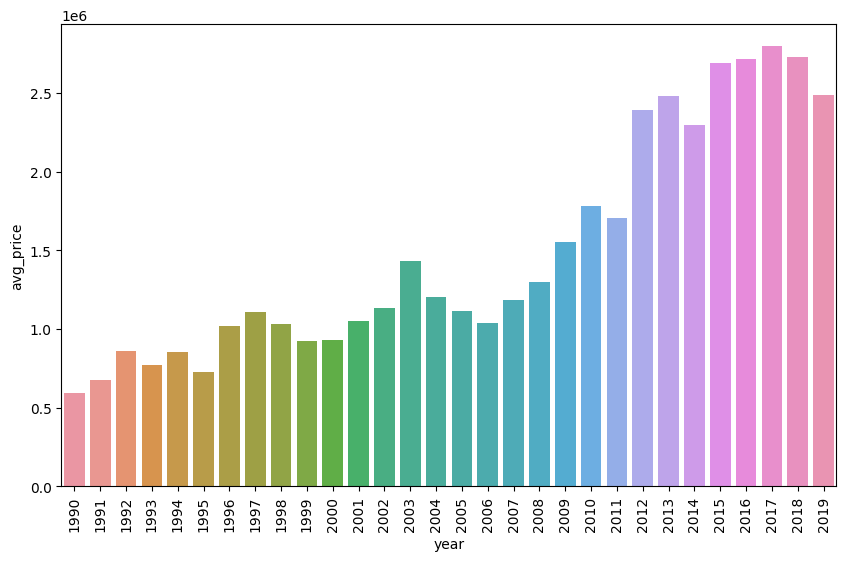

In [10]:
df_cars_grp_years = df_cars.groupby(['year']).agg(avg_price = ('price', 'mean')).reset_index()

plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.xticks(rotation=90)
sns.barplot(data = df_cars_grp_years, x = 'year', y = 'avg_price')


### We can see that as year increase, price increases as well. This is also expected because new car will cost more as compare to old cars

In [11]:
df_cars.head(2)

,brand,model,price,year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered


##### analysing mileage feature

<Axes: xlabel='mileage', ylabel='Count'>

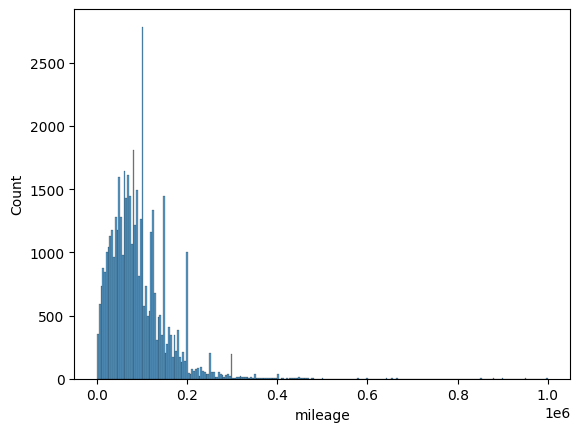

In [12]:
## checking mileage
sns.histplot(data = df_cars, x='mileage')

<Axes: xlabel='mileage', ylabel='price'>

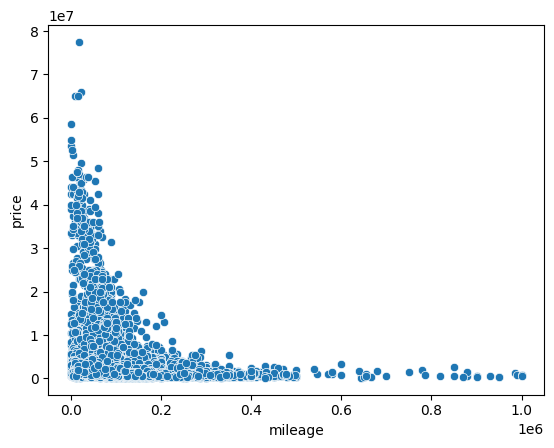

In [13]:
sns.scatterplot(data = df_cars, x = 'mileage', y='price')

In [14]:
# checking very large mileage numbers
df_cars[df_cars['mileage']>600000].shape

(29, 13)

In [15]:
# removing these outliers 
df_cars = df_cars[df_cars['mileage']<=600000].copy()

##### analysing engine capacity feature

In [16]:
## analysing engine capacity
print(df_cars.shape)
df_cars.head(2)

(45993, 13)


,brand,model,price,year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered


<Axes: xlabel='engine_capacity', ylabel='Count'>

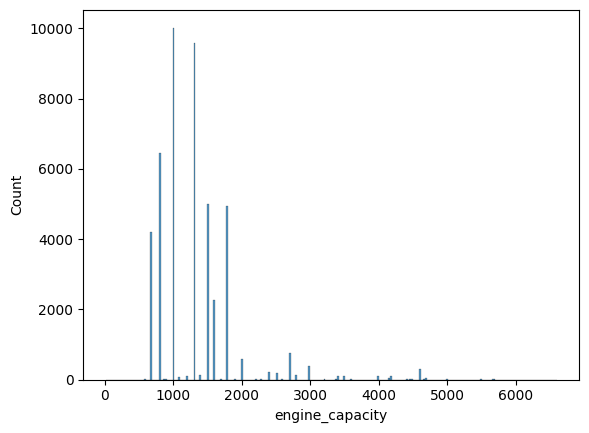

In [17]:
sns.histplot(data = df_cars, x = 'engine_capacity')

In [18]:
df_cars[df_cars['engine_capacity']>5000]

,brand,model,price,year,location,mileage,engine_type,engine_capacity,color,assembly,body_type,transmission_type,registration_status
3948,Mercedes,Benz,8000000,2006,Punjab,76800,Petrol,5500,Silver,Imported,Sedan,Automatic,Registered
4348,Lexus,LX,18500000,2008,Punjab,65000,Petrol,5663,Silver,Imported,SUV,Automatic,Registered
4367,Mercedes,Benz,9500000,2007,Punjab,80000,Petrol,5461,Blue,Imported,Sedan,Automatic,Registered
5874,Suzuki,Mehran,890000,2016,Punjab,429185,Petrol,6600,Grey,Local,Hatchback,Manual,Registered
11490,Lexus,LX,46000000,2015,Punjab,30000,Petrol,5700,Silver,Imported,SUV,Automatic,Un-Registered
16190,Hummer,H2,15000000,2008,Islamabad,140000,Petrol,6200,White,Imported,SUV,Automatic,Registered
17920,Mercedes,Benz,9500000,2008,Islamabad,127000,Petrol,5500,Black,Imported,Sedan,Automatic,Registered
18475,Honda,Civic,600000,1995,KPK,177000,Petrol,5656,White,Local,Sedan,Manual,Registered
19606,Mercedes,Benz,6500000,2005,Islamabad,60000,Petrol,5500,Silver,Imported,Sedan,Automatic,Registered
20155,Lexus,LX,77500000,2018,Islamabad,17500,Petrol,5700,White,Imported,SUV,Automatic,Un-Registered


### As we can see that car having engine capacity above 5000 are premium cars having high price

### Data Processing, handling categorical variables

In [19]:
df_cars.columns

Index(['brand', 'model', 'price', 'year', 'location', 'mileage', 'engine_type',
       'engine_capacity', 'color', 'assembly', 'body_type',
       'transmission_type', 'registration_status'],
      dtype='object')

In [20]:
# checking unique values present in categorical features
categorical_columns = ['brand', 'model', 'location', 'engine_type',
        'color', 'assembly', 'body_type',
       'transmission_type', 'registration_status']
for column in categorical_columns:
    print("unique values for feature :", column, df_cars[column].nunique())

unique values for feature : brand 31
unique values for feature : model 196
unique values for feature : location 6
unique values for feature : engine_type 3
unique values for feature : color 24
unique values for feature : assembly 2
unique values for feature : body_type 6
unique values for feature : transmission_type 2
unique values for feature : registration_status 2


In [21]:
# creating dummies for features 

categorical_columns = ['brand', 'model', 'location', 'engine_type','color', 'body_type', 'assembly', 'transmission_type', 'registration_status']
df_cars_encoded = df_cars.copy()
for column in categorical_columns:
    df_cars_encoded = pd.get_dummies(df_cars_encoded, columns=[column], prefix=column)

print(df_cars_encoded.shape)
df_cars_encoded.head()

(45993, 276)


,price,year,mileage,engine_capacity,brand_Adam,brand_Audi,brand_BMW,brand_Chery,brand_Chevrolet,brand_DFSK,brand_Daewoo,brand_Daihatsu,brand_FAW,brand_Fiat,brand_Honda,brand_Hummer,brand_Hyundai,brand_Jaguar,brand_Jeep,brand_KIA,brand_Land,brand_Lexus,brand_MINI,brand_Mazda,brand_Mercedes,brand_Mitsubishi,brand_Nissan,brand_Porsche,brand_Range,brand_SsangYong,brand_Subaru,brand_Suzuki,brand_Toyota,brand_United,brand_Volvo,model_3,model_5,model_7,model_A3,model_A4,model_A5,model_A6,model_A7,model_APV,model_Accord,model_Acty,model_Allion,model_Alphard,model_Altezza,model_Alto,model_Aqua,model_Auris,model_Avanza,model_Aveo,model_Axela,model_Aygo,model_Azwagon,model_B,model_Baleno,model_Bego,model_Belta,model_Benz,model_Blue,model_Bluebird,model_Bolan,model_Boon,model_Bravo,model_C-HR,model_C37,model_CJ,model_CR-V,model_CT200h,model_Caldina,model_Cami,model_Camry,model_Carol,model_Cast,model_Cayenne,model_Cefiro,model_Celerio,model_Cervo,model_Charade,model_Ciaz,model_City,model_Civic,model_Clipper,model_Convoy,model_Cooper,model_Corolla,model_Corona,model_Coupe,model_Cross,model_Crown,model_Cultus,model_Cuore,model_Dayz,model_Dias,model_Duet,model_EK,model_Ek,model_Esse,model_Estima,model_Excel,model_Exclusive,model_FX,model_Familia,model_Fit,model_Flair,model_Fortuner,model_Freed,model_Galant,model_Glory,model_Grace,model_H2,model_HR-V,model_Hiace,model_Hijet,model_Hilux,model_Hustler,model_I,model_ISIS,model_IST,model_Impreza,model_Insight,model_Jimny,model_Joy,model_Juke,model_Justy,model_Kei,model_Khyber,model_Kizashi,model_L300,model_LX,model_Lancer,model_Land,model_Latio,model_Liana,model_Life,model_MR,model_Macan,model_March,model_Margalla,model_Mark,model_Mehran,model_Minica,model_Mira,model_Mirage,model_Moco,model_Move,model_N,model_Noah,model_Note,model_Optra,model_Otti,model_Outlander,model_Pajero,model_Palette,model_Panamera,model_Passo,model_Patrol,model_Picanto,model_Pino,model_Pixis,model_Platz,model_Pleo,model_Porte,model_Potohar,model_Prado,model_Premio,model_Pride,model_Prius,model_Probox,model_Q2,model_Q3,model_Q7,model_QQ,model_RX,model_Racer,model_Ractis,model_Rav4,model_Revo,model_Roox,model_Rover,model_Rumion,model_Rush,model_S40,model_Santro,model_Scrum,model_Sienta,model_Sirius,model_Skyline,model_Solio,model_Sonica,model_Spectra,model_Splash,model_Sportage,model_Starlet,model_Stavic,model_Stella,model_Stream,model_Succeed,model_Sunny,model_Surf,model_Swift,model_Sx4,model_Tanto,model_Terios,model_Terrano,model_Thats,model_Tiida,model_Uno,model_V2,model_Vamos,model_Vanguard,model_Vezel,model_Vitara,model_Vitz,model_Voxy,model_Wagon,model_Wake,model_Wish,model_Wrangler,model_X,model_X-PV,model_X1,model_X3,model_X5,model_X6,model_XF,model_Zest,model_iQ,location_Balochistan,location_Islamabad,location_KPK,location_Kashmir,location_Punjab,location_Sindh,engine_type_Diesel,engine_type_Hybrid,engine_type_Petrol,color_Assembly,color_Beige,color_Black,color_Blue,color_Bronze,color_Brown,color_Burgundy,color_Gold,color_Green,color_Grey,color_Indigo,color_Magenta,color_Maroon,color_Navy,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Turquoise,color_Unlisted,color_White,color_Wine,color_Yellow,body_type_Cross Over,body_type_Hatchback,body_type_Mini Van,body_type_SUV,body_type_Sedan,body_type_Van,assembly_Imported,assembly_Local,transmission_type_Automatic,transmission_type_Manual,registration_status_Registered,registration_status_Un-Registered
0,2385000,2017,9869,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0

In [23]:
print(df_cars_encoded.shape)
df_cars_encoded.head()


(45993, 276)


,price,year,mileage,engine_capacity,brand_Adam,brand_Audi,brand_BMW,brand_Chery,brand_Chevrolet,brand_DFSK,brand_Daewoo,brand_Daihatsu,brand_FAW,brand_Fiat,brand_Honda,brand_Hummer,brand_Hyundai,brand_Jaguar,brand_Jeep,brand_KIA,brand_Land,brand_Lexus,brand_MINI,brand_Mazda,brand_Mercedes,brand_Mitsubishi,brand_Nissan,brand_Porsche,brand_Range,brand_SsangYong,brand_Subaru,brand_Suzuki,brand_Toyota,brand_United,brand_Volvo,model_3,model_5,model_7,model_A3,model_A4,model_A5,model_A6,model_A7,model_APV,model_Accord,model_Acty,model_Allion,model_Alphard,model_Altezza,model_Alto,model_Aqua,model_Auris,model_Avanza,model_Aveo,model_Axela,model_Aygo,model_Azwagon,model_B,model_Baleno,model_Bego,model_Belta,model_Benz,model_Blue,model_Bluebird,model_Bolan,model_Boon,model_Bravo,model_C-HR,model_C37,model_CJ,model_CR-V,model_CT200h,model_Caldina,model_Cami,model_Camry,model_Carol,model_Cast,model_Cayenne,model_Cefiro,model_Celerio,model_Cervo,model_Charade,model_Ciaz,model_City,model_Civic,model_Clipper,model_Convoy,model_Cooper,model_Corolla,model_Corona,model_Coupe,model_Cross,model_Crown,model_Cultus,model_Cuore,model_Dayz,model_Dias,model_Duet,model_EK,model_Ek,model_Esse,model_Estima,model_Excel,model_Exclusive,model_FX,model_Familia,model_Fit,model_Flair,model_Fortuner,model_Freed,model_Galant,model_Glory,model_Grace,model_H2,model_HR-V,model_Hiace,model_Hijet,model_Hilux,model_Hustler,model_I,model_ISIS,model_IST,model_Impreza,model_Insight,model_Jimny,model_Joy,model_Juke,model_Justy,model_Kei,model_Khyber,model_Kizashi,model_L300,model_LX,model_Lancer,model_Land,model_Latio,model_Liana,model_Life,model_MR,model_Macan,model_March,model_Margalla,model_Mark,model_Mehran,model_Minica,model_Mira,model_Mirage,model_Moco,model_Move,model_N,model_Noah,model_Note,model_Optra,model_Otti,model_Outlander,model_Pajero,model_Palette,model_Panamera,model_Passo,model_Patrol,model_Picanto,model_Pino,model_Pixis,model_Platz,model_Pleo,model_Porte,model_Potohar,model_Prado,model_Premio,model_Pride,model_Prius,model_Probox,model_Q2,model_Q3,model_Q7,model_QQ,model_RX,model_Racer,model_Ractis,model_Rav4,model_Revo,model_Roox,model_Rover,model_Rumion,model_Rush,model_S40,model_Santro,model_Scrum,model_Sienta,model_Sirius,model_Skyline,model_Solio,model_Sonica,model_Spectra,model_Splash,model_Sportage,model_Starlet,model_Stavic,model_Stella,model_Stream,model_Succeed,model_Sunny,model_Surf,model_Swift,model_Sx4,model_Tanto,model_Terios,model_Terrano,model_Thats,model_Tiida,model_Uno,model_V2,model_Vamos,model_Vanguard,model_Vezel,model_Vitara,model_Vitz,model_Voxy,model_Wagon,model_Wake,model_Wish,model_Wrangler,model_X,model_X-PV,model_X1,model_X3,model_X5,model_X6,model_XF,model_Zest,model_iQ,location_Balochistan,location_Islamabad,location_KPK,location_Kashmir,location_Punjab,location_Sindh,engine_type_Diesel,engine_type_Hybrid,engine_type_Petrol,color_Assembly,color_Beige,color_Black,color_Blue,color_Bronze,color_Brown,color_Burgundy,color_Gold,color_Green,color_Grey,color_Indigo,color_Magenta,color_Maroon,color_Navy,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Turquoise,color_Unlisted,color_White,color_Wine,color_Yellow,body_type_Cross Over,body_type_Hatchback,body_type_Mini Van,body_type_SUV,body_type_Sedan,body_type_Van,assembly_Imported,assembly_Local,transmission_type_Automatic,transmission_type_Manual,registration_status_Registered,registration_status_Un-Registered
0,2385000,2017,9869,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0

In [24]:
# Spliting the dataset in training and testing

X = df_cars_encoded.drop(columns=['price'])
y = df_cars_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# fitting multiple linear regression on training dataset

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
# Prediction on test dataset
y_pred = model.predict(X_test)
print(len(y_pred))

9199


In [27]:
# calculating mean squared error (mse) 

mse = mean_squared_error(y_test, y_pred)
print(mse)



2867243496836.931


In [28]:
# calculating root mean squared error (rmse) 

rmse = np.sqrt(mse)
print(rmse)

1693293.6829850075


In [29]:
# calculating r2 score

r2 = r2_score(y_test, y_pred)

print(r2)

0.6493368800116982
